<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Ondas-y-Optica/blob/main/3_Osciladores_Acoplados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Oscilaciones acopladas y Modos Normales**



## Este cuaderno muestra la integración (numérica) 
de un sistema de tres osciladores acoplados

## **Ejercicio**: Utilice este código como base para estudiar el problema de dos osciladores acoplados 


------------------------------------------------

## Bibliotecas

In [ ]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

In [ ]:
%matplotlib inline

# additional imports for outputting to the IPython session
from IPython.display import HTML 

------------------------------------------------

## Descripción del sistema  físico: 

* Tres puntos materiales que se deslizan sin rozamiento por una pista rectilínea. Dos de ellos ligados a puntos fijos (localizados en x=0 y x=L) a través de dos resortes
* El tercer punto está conectado a dos resortes que a su vez se conectan con los dos puntos ya descritos.
* A grosso modo, las fuerzas (horizontales) netas ejercidas sobre cada punto material (el primer punto es el más cercano a x=0) son

$$F_1=k_1(elongación\,\,del\,\,resorte\,\,1)+k_2(elongación\,\,del\,\,resorte\,\,2)$$

$$F_2=k_2(elongación\,\,del\,\,resorte\,\,2)+k_3(elongación\,\,del\,\,resorte\,\,3)$$

$$F_2=k_3(elongación\,\,del\,\,resorte\,\,3)+k_4(elongación\,\,del\,\,resorte\,\,4)$$

* $eq_1$, $eq_2$ y $eq_3$ son las posiciones de equilibrio de cada uno de los puntos mientras que $x_1$, $x_2$ y $x_3$ son sus coordenadas y $\xi_1$, $\xi_2$ y $\xi_3$ son las desviaciones del equilibrio de cada punto material,
* En consecuencia: $x_i=\xi_1+eq_i$, $i=1,2,3$ 

Escribamos $F_1$ de forma precisa:

$$\vec{F}_1=\left[-k_1(x_1-eq_1)+k_2(x_2-x_1-\ell_2)\right]\hat{\mathbf{e}}_1$$

donde $\ell_2=$ longitud de equilibrio del resorte $\#{}2$, $\ell_2=eq_2-eq_1$.

Al sustituir:

$x_1-eq_1=\xi_1+eq_1-eq_1=\xi_1$,  $x_2-x_1-\ell_2=\xi_2+eq_2-(\xi_1+eq_1)-(eq_2-eq_1)=\xi_2-\xi_1$ y de acá:

$$\vec{F}_1=\left[-k_1\,\xi_1+k_2(\xi_2-\xi_1)\right]\hat{\mathbf{e}}_1$$

* Para $\vec{F}_2$

$$\vec{F}_2=\left[-k_2(x_2-x_1-\ell_2)+k_3(x_3-x_2-\ell_3)\right]\hat{\mathbf{e}}_1$$

Ya sabemos como queda el primer término, el segundo, 

$$x_3-x_2-\ell_3=\xi_3+eq_3-(\xi_2+eq_2)-(eq_3-eq_2)=\xi_3-\xi_2$$

y de allí:
$$\vec{F}_2=\left[-k_2(\xi_2-\xi_1)+k_3(\xi_3-\xi_2)\right]\hat{\mathbf{e}}_1$$

* Finalmente, para $\vec{F}_3$ hay que ser algo cuidadoso con la elongación ($\Delta$) del resorte que se une a la pared cuya longitud de equilibrio es $\ell_4=L-eq_3$. Ahora bien, $L-x_3$ es la distancia entre el tercer punto material y la pared y como $\ell_4$ es la longitud de equibrio del resorte $\#4$, la elongación $\Delta$ resulta siendo: 

$$\Delta=(L-x_3)-\ell_4=L-eq_3-\xi_3-\ell_4$$,

nos interesa el caso en que las longitudes de equilibrio de todos los resortes son iguales, debido a ello:

$$\Delta=4\ell-3\ell-\xi_3-\ell=-\xi_3\$$,

Para verificar la consistencia del resultado basta con notar que cuando la partícula $\#3$ se encuentra a la derecha del punto de equilibrio, $\xi_3$ es una cantidad positiva y  por tanto, el signo de $-\xi_3$ indica que el resorte $\#4$ se contrajo, al contrario, cuando la partícula se encuentra a la izquierda del punto de equilibrio, el resorte se estira lo que corresponde a un valor negativo de la cantidad $\xi_3$.

$$\vec{F}_3=\left[-k_3(x_3-x_2-\ell_3)+k_4\Delta\right]\hat{\mathbf{e}}_1$$

Se reduce a

$$\vec{F}_3=\left[-k_3(\xi_3-\xi_2)-k_4\,\xi_3\right]\hat{\mathbf{e}}_1$$


## Ecuaciones de Movimiento

$$M_1\ddot{\xi}_1=-k_1\,\xi_1+k_2(\xi_2-\xi_1)$$

$$M_2\ddot{\xi}_2=-k_2(\xi_2-\xi_1)+k_3(\xi_3-\xi_2)$$

$$M_3\ddot{\xi}_3=-k_3(\xi_3-\xi_2)-k_4\,\xi_3$$


## Condiciones iniciales para los modos normales cuando todas las constantes elásticas y las masas son iguales

(salvo normalización)

* $A$ constante

* Primer modo: $\xi_1(0)=-\xi_3(0)=A,\,\,\,\xi_2(0)=0$

* Modo rápido: $\xi_1(0)=\xi_3(0)=A,\,\,\xi_2=-\sqrt{2}\,A$, 

* Modo lento: $\xi_1(0)=\xi_3(0)=A,\,\,\,\xi_2(0)=\sqrt{2}\,A$


------------------------------------------------

## Ejercicio:  

Reduzca el orden del sistema llevándolo a primer orden

------------------------------------------------

# Integración de las Ecuaciones de Movimiento


* La integración numérica requiere reducir el sistema de ecuaciones a un sistema de primer orden
* El sistema se define como una función de Python.


**Notación** (en el código) para los parámetros del sistema

* k, constantes de lo resortes duros en Nw/m
* $\kappa$ (kappa), Constantes para los resortes suaves
* $M_i\,\,i=1,2,3$, masas de las partículas en Kg. 
en el código aparecen como M1, M2, M3  
* eq_1, eq_2 y eq_3 posicions de equilibrio de las partículas
* $\omega_i^2=k_i/M_i\,\,,i=1,2,3$


In [ ]:
def ecs_de_mov(xi, t):

    # xi[0], xi[2] y xi[4] son x_1, x_2, x_3, x3>x_2>x_1

    dydx = np.zeros_like(xi)

    dydx[0] = xi[1] # xi[1] es v_1

    dydx[1] = -omega1_2*xi[0]+kappa*(xi[2]-xi[0])/M1

    dydx[2] = xi[3] # xi[3] es v_2

    dydx[3] = -kappa*(xi[2]-xi[0])/M2 + kappa*(xi[4]-xi[2])/M2

    dydx[4] = xi[5] # xi[3] es v_2

    dydx[5] = -omega3_2*xi[4]-kappa*(xi[4]-xi[2])/M3

    return dydx

**Valores de los parámetros**

Si lo desea, puede jugar con estos valores para estudiar límites físicos interesantes.

In [ ]:
k1 = 1.0
k2=1
k3=1

kappa = 1.0  
M1 = 1.0  
M2 = 1.0  
M3 = 1.0

eq_1=3.0 
eq_2=6.0 
eq_3=9.0

omega1_2=k1/M1
omega2_2=k2/M2
omega3_2=k3/M3

ell=3.0 # Longitud de equilibrio de los resortes suaves

* Condiciones Iniciales

* **Ejercicio** juegue con las tres posibilidades o con calquier conjunto de valores que le parezca interesante 

In [ ]:
# Condiciones iniciales para el modo rápido
x10 = 0.5
v10 = 0.0
x20 = -np.sqrt(2)/2.
v20 = 0.0
x30 = 0.5
v30 = 0.0

In [ ]:
# Las condiciones iniciales deben introducirse como una LISTA
xi = [x10, v10, x20, v20, x30, v30]
print(xi)

[0.5, 0.0, -0.7071067811865476, 0.0, 0.5, 0.0]


## Integración de las ecs. de movimiento

* La técnica estándar que se estudia en un curso estándar es el método de Runge Kuta de orden 4. 
* Obviamente hay montones de técnicas mucho más sofisticadas. La función **scipy.integrate** utiliza técnicas avanzadas y por eso se utiliza en este cuaderno.

* La integración requiere crear un arreglo de muestras de tiempo
* np.arrange(tini,tfin,dt) crea las muestras entre los instantes tin y tfin con muestreo dt

In [ ]:
tini=0.0
tfin=30.0
dt = 0.05
t = np.arange(tini,tfin, dt)

In [ ]:
y = integrate.odeint(ecs_de_mov, xi, t)

x_1 = y[:, 0]

x_1 = [ s + eq_1 for s in x_1]

x_2 = y[:, 2]

x_2 = [u + eq_2 for u in x_2]

x_3 = y[:,4]

x_3 = [v + eq_3 for v in x_3]

------------------------------------------------

## Animación

* Cortesía de Samuel Alonso (https://github.com/samontenegro)

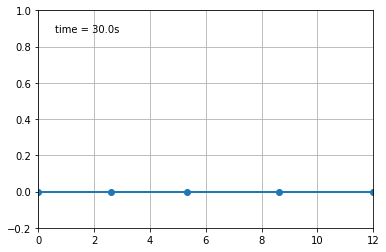

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0., 12.), ylim=(-0.2, 1.0))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x_1[i], x_2[i], x_3[i], 12.0]

    line.set_data(thisx, 0)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

ani.save('3-oscillators.mp4', fps=15)

HTML(ani.to_jshtml())

#plt.show()